In [270]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from scipy.stats import skew, kurtosis
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.animation as animation
from IPython.display import HTML
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/oil2.csv')
dfs=df.copy()
dfs

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,datetime,Porosity,Permeability,Depth,Temperature,Pressure,Injection Type,Injection Rate,Injection Pressure,Injection Duration,Oil Production Rate,Water Cut,Cumulative Oil Production,Sensor Temperature,Sensor Pressure,Flow Rate,Oil Recovery Factor,Location
0,2021-01-01 13:42:05,0.102282,3117.788664,2894.343886,55.820664,1268.443562,Gas,659.634380,2771.706587,213.079954,284.411830,29.880582,31666.579376,55.918903,1080.335729,244.929054,9.815966,South Iran
1,2023-05-30 17:25:25,0.153266,315.261131,785.580319,148.488865,4948.133946,Chemical,113.841248,905.202989,39.641187,NaN,55.373271,11193.773397,153.745590,4933.295762,67.016987,9.894078,North Iran
2,2023-03-19 21:55:33,0.327786,2794.864213,2326.685599,NaN,3683.973859,Gas,4734.575595,3250.317633,16.691825,3568.968189,79.154346,637665.672546,116.860764,3585.947972,3547.281124,9.893567,South Iran
3,2020-03-19 20:07:01,0.378417,4386.820000,3228.595697,115.365599,3625.231934,Gas,924.107755,3139.766758,223.857708,398.478079,13.405904,63805.509700,119.293624,3724.877579,387.285909,9.852037,South Iran
4,2020-05-16 11:55:35,0.114646,3956.777108,4749.866291,134.048657,4326.688112,Gas,4357.729388,2868.584612,132.600541,3025.518678,14.933829,399720.814124,130.783040,4319.349959,3213.076663,10.047526,South Iran
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2023-02-02 18:12:13,0.192123,341.456186,761.963798,55.908012,1241.130694,Chemical,2170.826099,977.866429,117.878617,1036.268648,65.725485,178557.904376,56.070375,1408.097682,978.879205,9.904949,North Iran
9996,2021-02-15 06:13:58,0.350025,4338.992489,2891.166956,115.507002,3490.151785,Gas,3200.995363,3212.533054,261.362494,2037.151923,37.327160,262258.052912,115.382590,3429.388747,2207.151845,9.969294,South Iran
9997,2024-05-30 08:47:07,0.392041,3023.779460,2541.540404,103.464338,3079.382300,Steam,2458.573081,2597.879217,77.399091,1763.265872,19.045851,93769.878010,99.412539,2965.669887,1869.068938,18.808120,South Iran
9998,2024-12-29 18:36:16,0.103090,153.137134,1687.929073,118.518154,3660.727131,Chemical,4652.502679,2440.698159,251.173796,2541.681770,25.066609,240866.049853,112.638862,3504.728852,2601.731153,10.875716,North Iran


In [271]:
dfs['datetime']=pd.to_datetime(dfs['datetime'])
dfs['year']=dfs['datetime'].dt.year
dfs['month']=dfs['datetime'].dt.month
dfs['day']=dfs['datetime'].dt.day
dfs['hour']=dfs['datetime'].dt.hour
dfs['minute']=dfs['datetime'].dt.minute
dfs['second']=dfs['datetime'].dt.second

In [272]:
dfs = dfs.drop(columns=['datetime','hour','minute','second'])
dfs

,Porosity,Permeability,Depth,Temperature,Pressure,Injection Type,Injection Rate,Injection Pressure,Injection Duration,Oil Production Rate,Water Cut,Cumulative Oil Production,Sensor Temperature,Sensor Pressure,Flow Rate,Oil Recovery Factor,Location,year,month,day
0,0.102282,3117.788664,2894.343886,55.820664,1268.443562,Gas,659.634380,2771.706587,213.079954,284.411830,29.880582,31666.579376,55.918903,1080.335729,244.929054,9.815966,South Iran,2021.0,1.0,1.0
1,0.153266,315.261131,785.580319,148.488865,4948.133946,Chemical,113.841248,905.202989,39.641187,NaN,55.373271,11193.773397,153.745590,4933.295762,67.016987,9.894078,North Iran,2023.0,5.0,30.0
2,0.327786,2794.864213,2326.685599,NaN,3683.973859,Gas,4734.575595,3250.317633,16.691825,3568.968189,79.154346,637665.672546,116.860764,3585.947972,3547.281124,9.893567,South Iran,2023.0,3.0,19.0
3,0.378417,4386.820000,3228.595697,115.365599,3625.231934,Gas,924.107755,3139.766758,223.857708,398.478079,13.405904,63805.509700,119.293624,3724.877579,387.285909,9.852037,South Iran,2020.0,3.0,19.0
4,0.114646,3956.777108,4749.866291,134.048657,4326.688112,Gas,4357.729388,2868.584612,132.600541,3025.518678,14.933829,399720.814124,130.783040,4319.349959,3213.076663,10.047526,South Iran,2020.0,5.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.192123,341.456186,761.963798,55.908012,1241.130694,Chemical,2170.826099,977.866429,117.878617,1036.268648,65.725485,178557.904376,56.070375,1408.097682,978.879205,9.904949,North Iran,2023.0,2.0,2.0
9996,0.350025,4338.992489,2891.166956,115.507002,3490.151785,Gas,3200.995363,3212.533054,261.362494,2037.151923,37.327160,262258.052912,115.382590,3429.388747,2207.151845,9.969294,South Iran,2021.0,2.0,15.0
9997,0.392041,3023.779460,2541.540404,103.464338,3079.382300,Steam,2458.573081,2597.879217,77.399091,1763.265872,19.045851,93769.878010,99.412539,2965.669887,1869.068938,18.808120,South Iran,2024.0,5.0,30.0
9998,0.103090,153.137134,1687.929073,118.518154,3660.727131,Chemical,4652.502679,2440.698159,251.173796,2541.681770,25.066609,240866.049853,112.638862,3504.728852,2601.731153,10.875716,North Iran,2024.0,12.0,29.0


In [273]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Porosity                   9883 non-null   float64
 1   Permeability               10000 non-null  float64
 2   Depth                      10000 non-null  float64
 3   Temperature                9902 non-null   float64
 4   Pressure                   9875 non-null   float64
 5   Injection Type             10000 non-null  object 
 6   Injection Rate             9911 non-null   float64
 7   Injection Pressure         10000 non-null  float64
 8   Injection Duration         9904 non-null   float64
 9   Oil Production Rate        9909 non-null   float64
 10  Water Cut                  9886 non-null   float64
 11  Cumulative Oil Production  9910 non-null   float64
 12  Sensor Temperature         9915 non-null   float64
 13  Sensor Pressure            9913 non-null   floa

In [274]:
nan_columns=dfs.columns[dfs.isnull().any()]
nan_columns

Index(['Porosity', 'Temperature', 'Pressure', 'Injection Rate',
       'Injection Duration', 'Oil Production Rate', 'Water Cut',
       'Cumulative Oil Production', 'Sensor Temperature', 'Sensor Pressure',
       'Flow Rate', 'Oil Recovery Factor', 'year', 'month', 'day'],
      dtype='object')

In [275]:
dfs["Permeability"].fillna(dfs["Permeability"].mean(), inplace=True)  # میانگین
dfs["Pressure"].fillna(dfs["Pressure"].median(), inplace=True)  # میانه
dfs["Porosity"].fillna(dfs["Porosity"].median(), inplace=True)
dfs["Temperature"].fillna(dfs["Temperature"].median(), inplace=True)
dfs["Injection Rate"].fillna(dfs["Injection Rate"].median(), inplace=True)
dfs["Injection Duration"].fillna(dfs["Injection Duration"].median(), inplace=True)
dfs["Oil Production Rate"].fillna(dfs["Oil Production Rate"].median(), inplace=True)
dfs["Water Cut"].fillna(dfs["Water Cut"].median(), inplace=True)
dfs["Cumulative Oil Production"].fillna(dfs["Cumulative Oil Production"].median(), inplace=True)
dfs["Sensor Temperature"].fillna(dfs["Sensor Temperature"].median(), inplace=True)
dfs["Sensor Pressure"].fillna(dfs["Sensor Pressure"].median(), inplace=True)
dfs["Flow Rate"].fillna(dfs["Flow Rate"].median(), inplace=True)
dfs["Oil Recovery Factor"].fillna(dfs["Oil Recovery Factor"].median(), inplace=True)
dfs["year"].fillna(dfs["year"].median(), inplace=True)
dfs["month"].fillna(dfs["month"].median(), inplace=True)
dfs["day"].fillna(dfs["day"].median(), inplace=True)

<ipython-input-275-0a799e427755>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfs["Permeability"].fillna(dfs["Permeability"].mean(), inplace=True)  # میانگین
<ipython-input-275-0a799e427755>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

In [276]:
nan_columns=dfs.columns[dfs.isnull().any()]
nan_columns

Index([], dtype='object')

In [277]:
duplicates=dfs[dfs.duplicated()]
duplicates

,Porosity,Permeability,Depth,Temperature,Pressure,Injection Type,Injection Rate,Injection Pressure,Injection Duration,Oil Production Rate,Water Cut,Cumulative Oil Production,Sensor Temperature,Sensor Pressure,Flow Rate,Oil Recovery Factor,Location,year,month,day


In [278]:
dfs.describe()

,Porosity,Permeability,Depth,Temperature,Pressure,Injection Rate,Injection Pressure,Injection Duration,Oil Production Rate,Water Cut,Cumulative Oil Production,Sensor Temperature,Sensor Pressure,Flow Rate,Oil Recovery Factor,year,month,day
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,0.249125,2239.022223,2954.249221,99.777592,2993.031965,2630.558921,2542.963853,155.336155,1440.037953,39.967845,172778.325887,99.731350,2989.434453,1440.168711,11.267420,2021.994300,6.45930,15.782600
std,0.085650,1506.370725,1140.574769,28.820955,1150.841036,1865.191116,906.793813,83.514745,1087.697411,23.014576,130464.786200,29.030801,1159.277243,1113.914313,2.406627,1.410343,3.42802,8.773781
min,0.098590,10.326625,501.707464,49.098154,982.911554,98.833152,501.180767,9.895096,49.110896,0.002208,2521.092653,44.557326,790.461421,41.447250,9.800112,2020.000000,1.00000,1.000000
25%,0.176183,819.577075,2178.636553,74.523161,1981.144421,1310.142513,2034.950636,82.114793,667.894569,19.802296,72671.994827,74.371845,1981.200381,655.394970,9.950926,2021.000000,3.00000,8.000000
50%,0.248719,2112.110080,2875.693316,99.909822,3008.399156,2552.402453,2563.285784,155.519938,1295.572953,40.101860,141881.071692,100.046014,2999.932355,1274.066771,10.096211,2022.000000,6.00000,16.000000
75%,0.323014,3575.811897,3903.032498,124.801859,3984.141334,3784.487910,3293.140990,227.335380,1996.947836,59.697292,246233.729289,124.722932,3977.678219,1996.978277,11.398303,2023.000000,9.00000,23.000000
max,0.406532,4999.918181,4999.624608,152.563325,5083.816467,24630.647417,3999.253990,304.438005,16383.047074,81.480486,739089.416720,156.985367,5244.314800,17331.914064,20.338067,2024.000000,12.00000,31.000000


In [279]:
dfs['Injection Type'].value_counts()

,count
Injection Type,
Gas,4830
Steam,3321
Chemical,1849


In [280]:
dfs['Injection Type']=dfs['Injection Type'].replace(to_replace=['Gas','Steam','Chemical'], value=[0,1,2])
dfs['Injection Type']

<ipython-input-280-9c54683fcbee>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfs['Injection Type']=dfs['Injection Type'].replace(to_replace=['Gas','Steam','Chemical'], value=[0,1,2])


,Injection Type
0,0
1,2
2,0
3,0
4,0
...,...
9995,2
9996,0
9997,1
9998,2


In [281]:
dfs['Location'].value_counts()

,count
Location,
South Iran,6934
North Iran,3066


In [282]:
dfs['Location']=dfs['Location'].replace(to_replace=['South Iran','North Iran'], value=[0,1,])
dfs['Location']

<ipython-input-282-c6f5195b1bbd>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfs['Location']=dfs['Location'].replace(to_replace=['South Iran','North Iran'], value=[0,1,])


,Location
0,0
1,1
2,0
3,0
4,0
...,...
9995,1
9996,0
9997,0
9998,1


In [283]:
features=['Porosity','Permeability','Depth','Temperature','Pressure','Injection Rate','Injection Pressure','Injection Duration','Oil Production Rate','Water Cut','Cumulative Oil Production',
          'Sensor Temperature','Sensor Pressure','Flow Rate','Oil Recovery Factor','year','month','day']
scaler = StandardScaler()
dfs[features] = scaler.fit_transform(dfs[features])
dfs

,Porosity,Permeability,Depth,Temperature,Pressure,Injection Type,Injection Rate,Injection Pressure,Injection Duration,Oil Production Rate,Water Cut,Cumulative Oil Production,Sensor Temperature,Sensor Pressure,Flow Rate,Oil Recovery Factor,Location,year,month,day
0,-1.714541,0.583396,-0.052525,-1.525249,-1.498621,0,-1.056741,0.252267,0.691455,-1.062505,-0.438321,-1.081662,-1.509247,-1.646883,-1.073062,-0.603137,0,-0.705041,-1.592632,-1.684945
1,-1.119248,-1.277147,-1.901478,1.690218,1.698931,2,-1.349376,-1.806191,-1.385393,-0.132824,0.669410,-1.238592,1.860677,1.676871,-1.232788,-0.570679,1,0.713125,-0.425719,1.620523
2,0.918452,0.369013,-0.550245,0.004588,0.600410,0,1.128100,0.780099,-1.660201,1.957380,1.702767,3.563495,0.590072,0.514582,1.891723,-0.570891,0,0.713125,-1.009175,0.366725
3,1.509619,1.425881,0.240546,0.540884,0.549365,0,-0.914939,0.658179,0.820514,-0.957630,-1.154193,-0.835308,0.673879,0.634430,-0.945257,-0.588148,0,-1.414124,-1.009175,0.366725
4,-1.570177,1.140384,1.574388,1.189162,1.158911,0,0.926048,0.359108,-0.272248,1.457722,-1.087800,1.739579,1.069665,1.147251,1.591681,-0.506915,0,-1.414124,-0.425719,0.024780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.665549,-1.259757,-1.922184,-1.522218,-1.522355,2,-0.246493,-1.726055,-0.448536,-0.371233,1.119244,0.044302,-1.504029,-1.364139,-0.414136,-0.566161,1,0.713125,-1.300904,-1.570963
9996,1.178110,1.394129,-0.055310,0.545790,0.431984,0,0.305848,0.738429,1.269616,0.548998,-0.114745,0.685888,0.539152,0.379526,0.688582,-0.539423,0,-0.705041,-1.300904,-0.089202
9997,1.668694,0.520985,-0.361861,0.127925,0.075036,1,-0.092213,0.060563,-0.933260,0.297182,-0.909121,-0.605622,-0.010982,-0.020500,0.385058,3.133464,0,1.422208,-0.425719,1.620523
9998,-1.705107,-1.384778,-1.110303,0.650273,0.580209,2,1.084095,-0.112783,1.147611,1.012873,-0.647502,0.521912,0.444637,0.444518,1.042828,-0.162769,1,1.422208,1.616378,1.506541


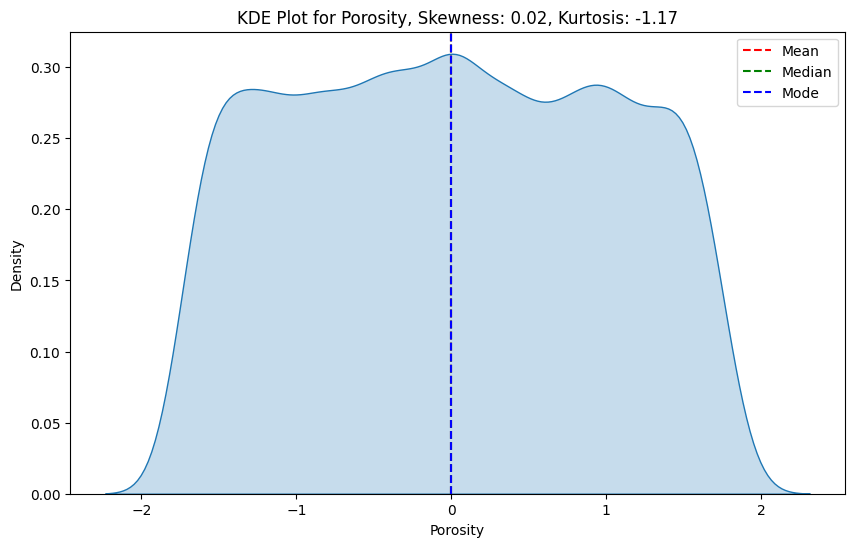

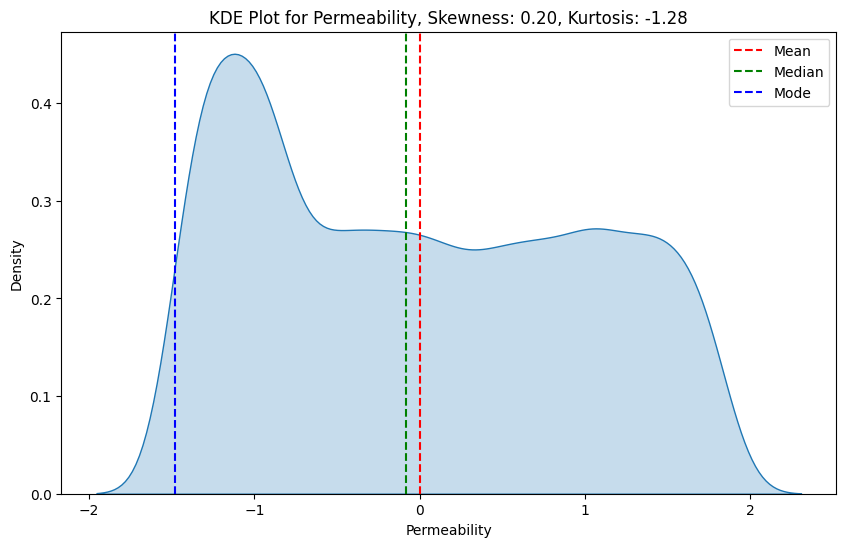

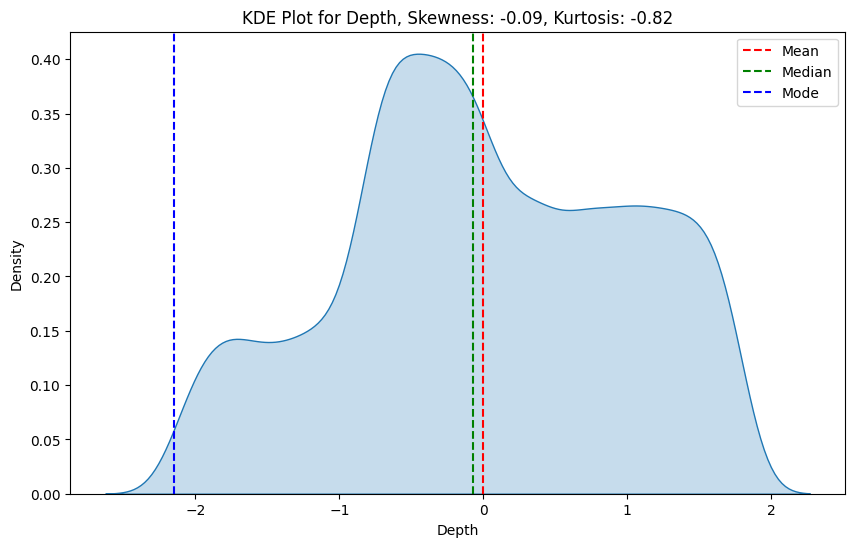

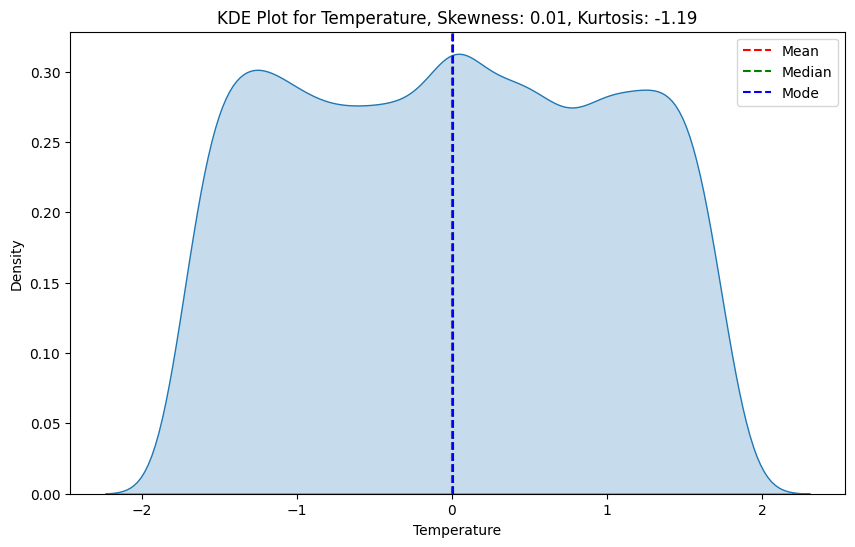

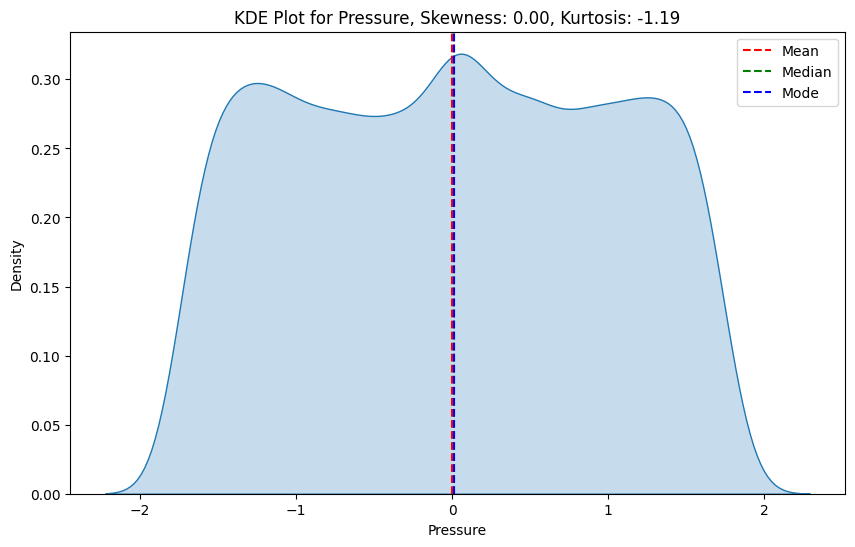

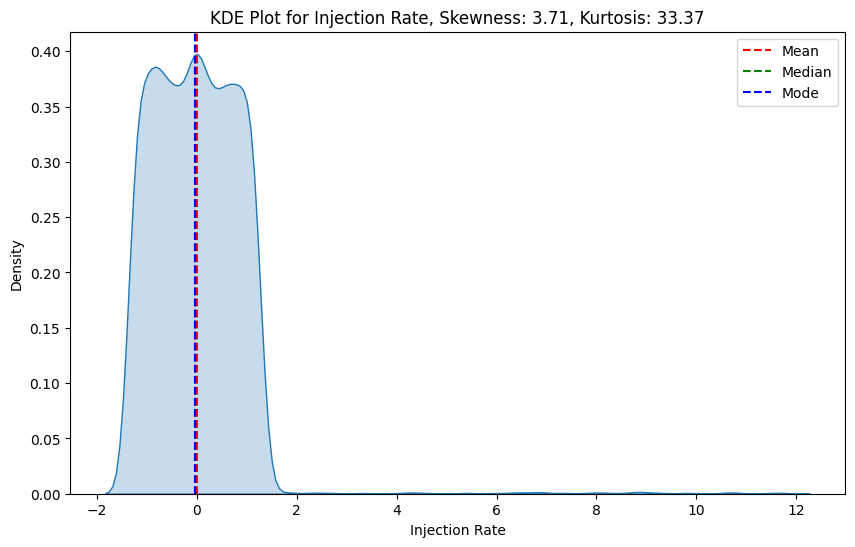

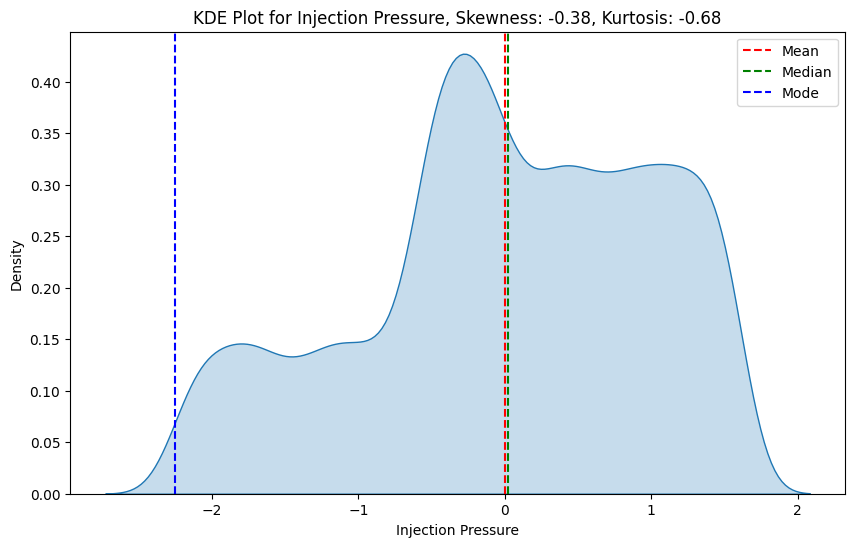

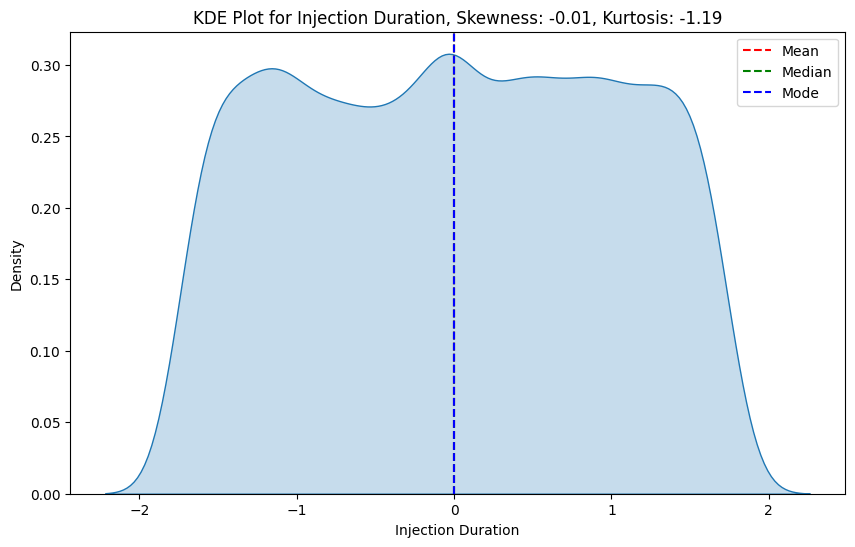

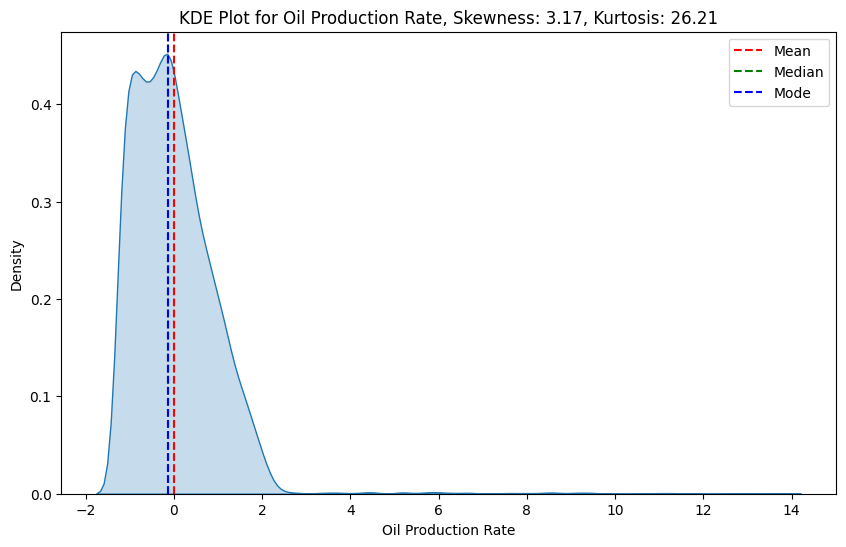

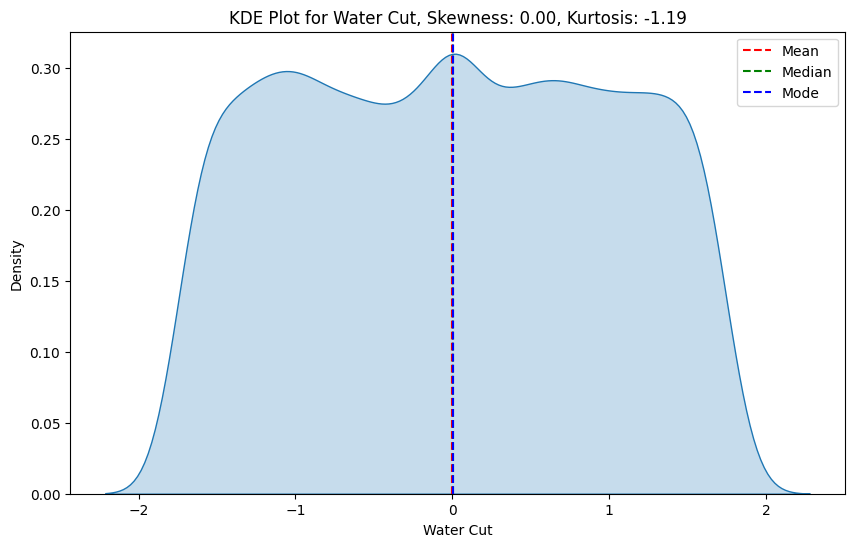

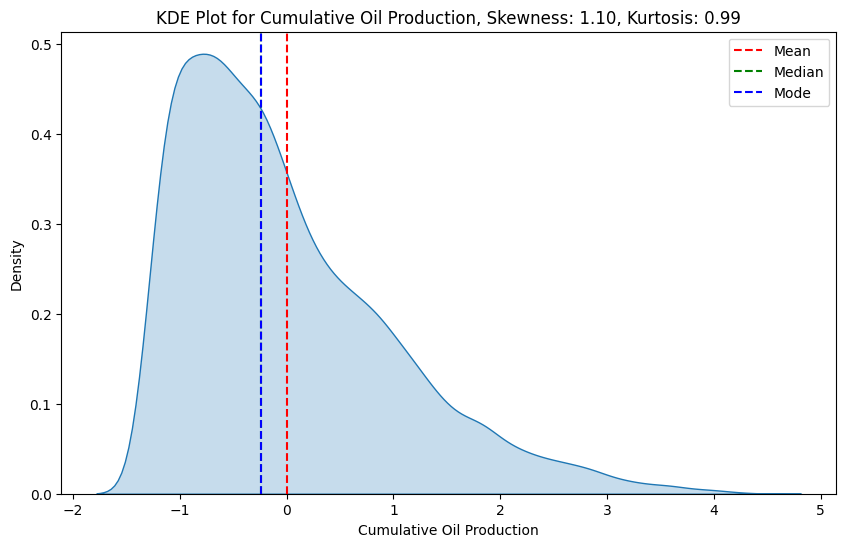

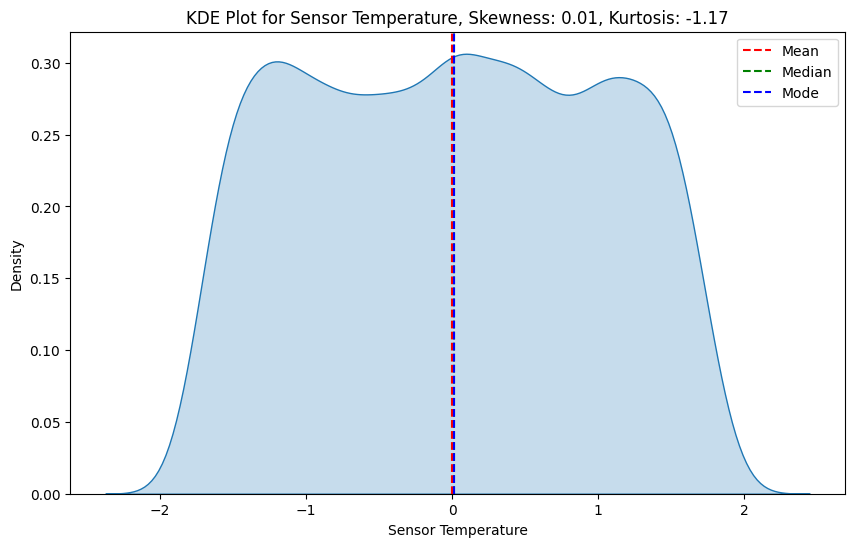

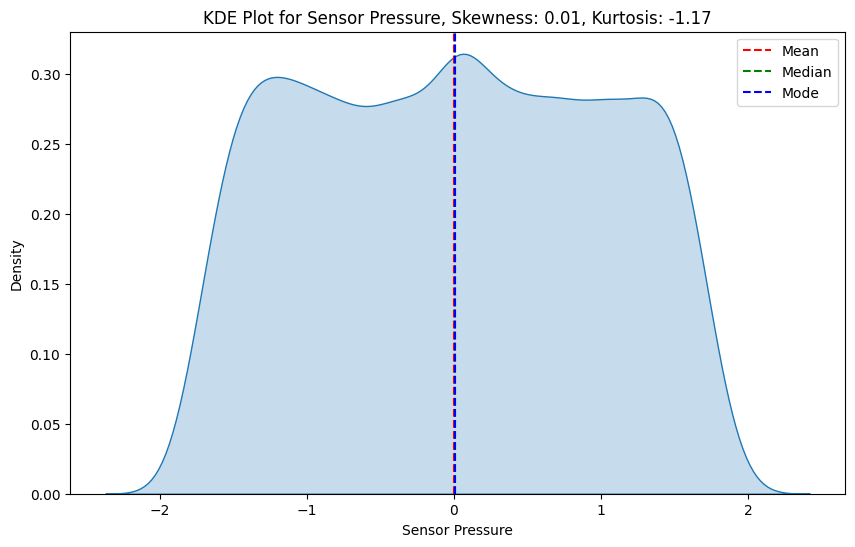

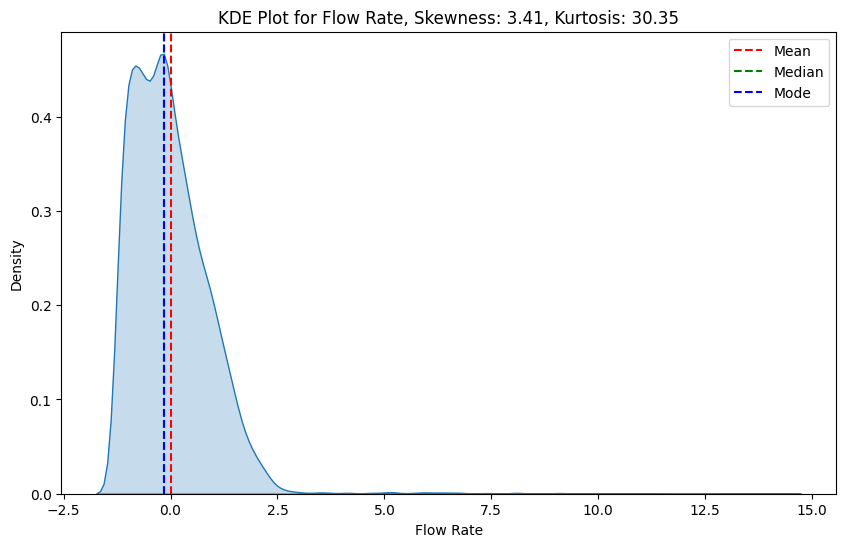

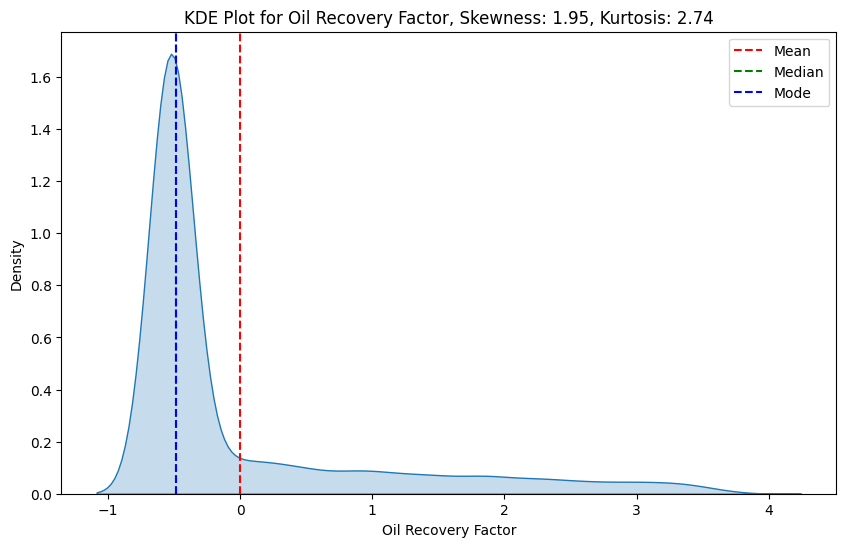

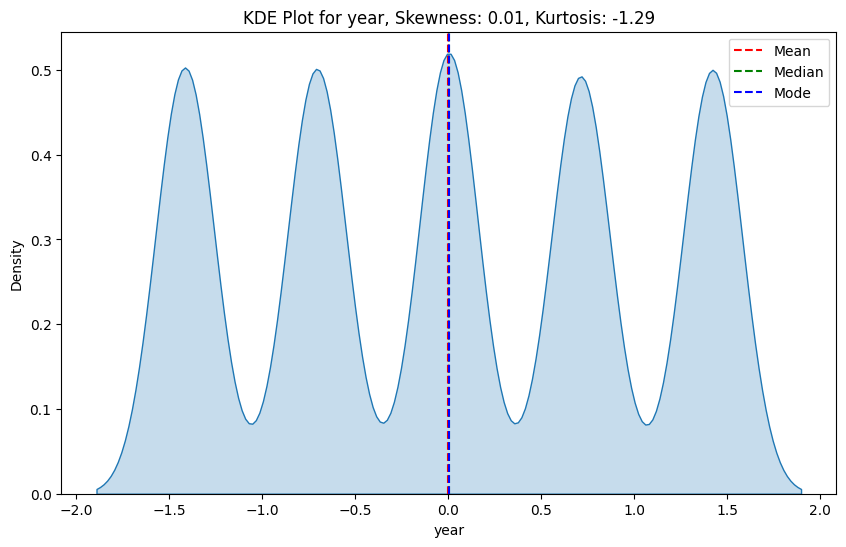

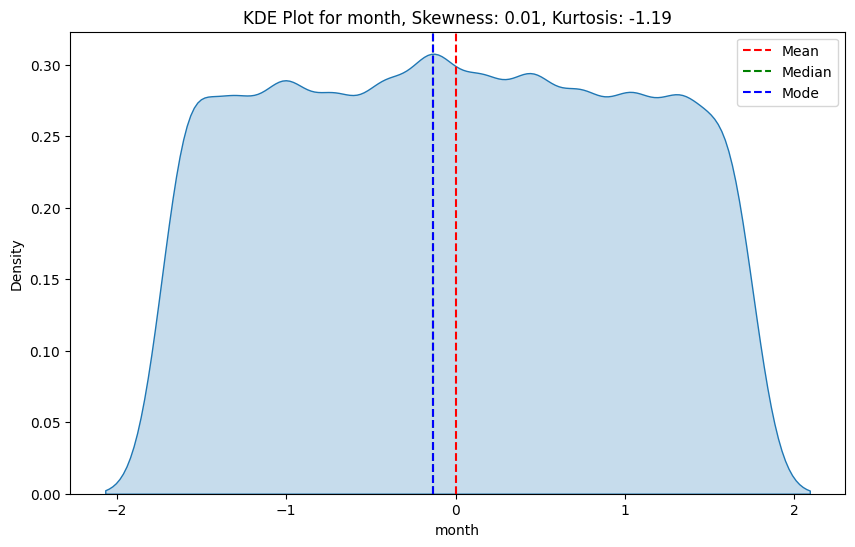

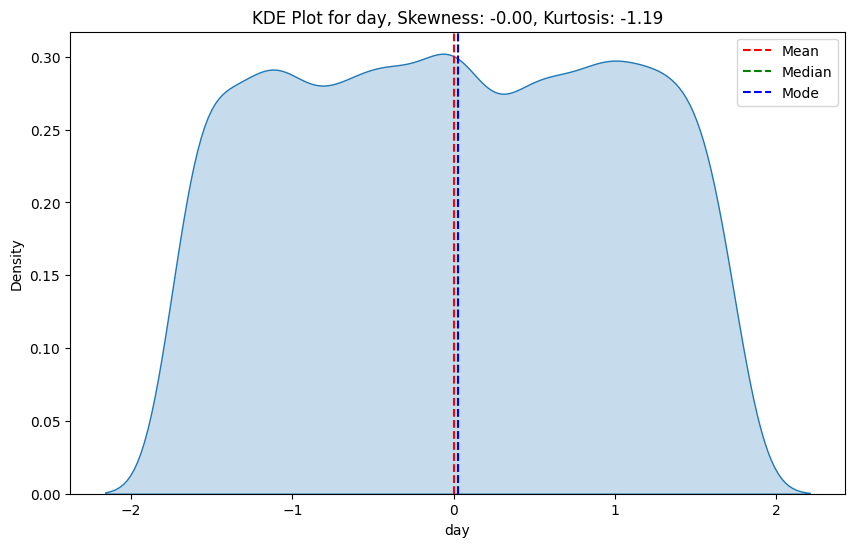

In [284]:
for feature in features:
  plt.figure(figsize=(10,6))
  sns.kdeplot(dfs[feature],fill=True)
  mean_value=dfs[feature].mean()
  mode_value=dfs[feature].mode()[0]
  median_value=dfs[feature].median()
  plt.axvline(mean_value, color='r',linestyle='--',label='Mean')
  plt.axvline(median_value, color='g',linestyle='--',label='Median')
  plt.axvline(mode_value, color='b',linestyle='--',label='Mode')
  skewness=skew(dfs[feature])
  kurt=kurtosis(dfs[feature])
  plt.title(f'KDE Plot for {feature}, Skewness: {skewness:.2f}, Kurtosis: {kurt:.2f}')
  plt.legend()
  plt.show()

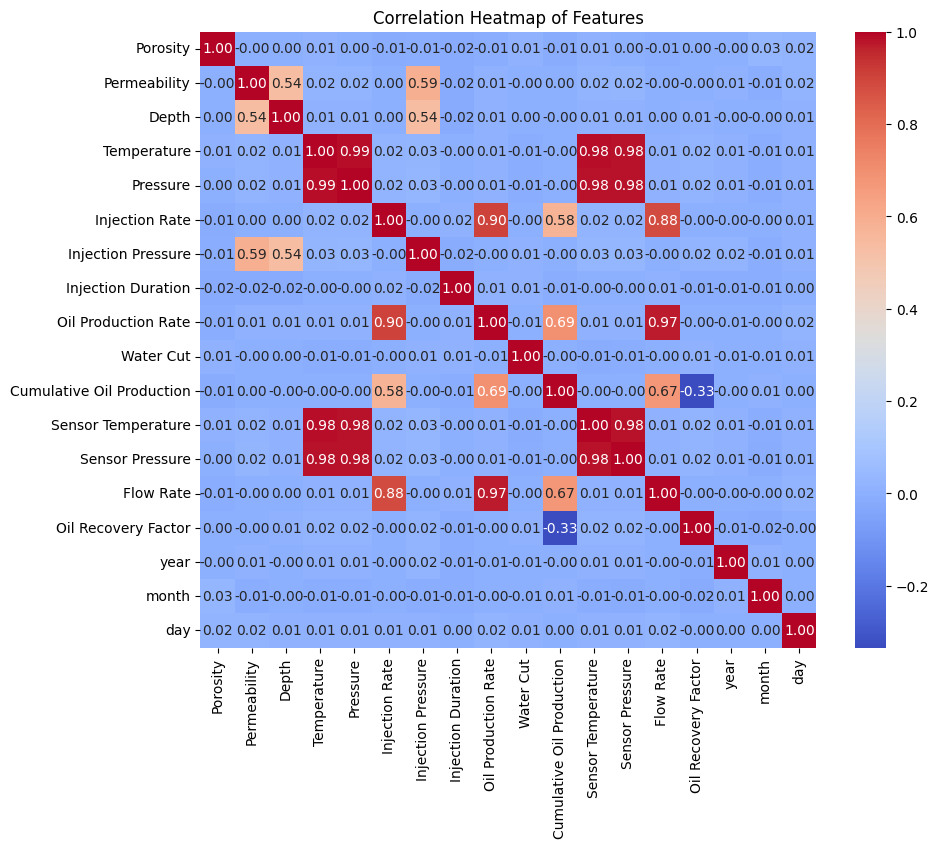

In [285]:
correlation_matrix=dfs[features].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f',square=True)
plt.title('Correlation Heatmap of Features')
plt.show()

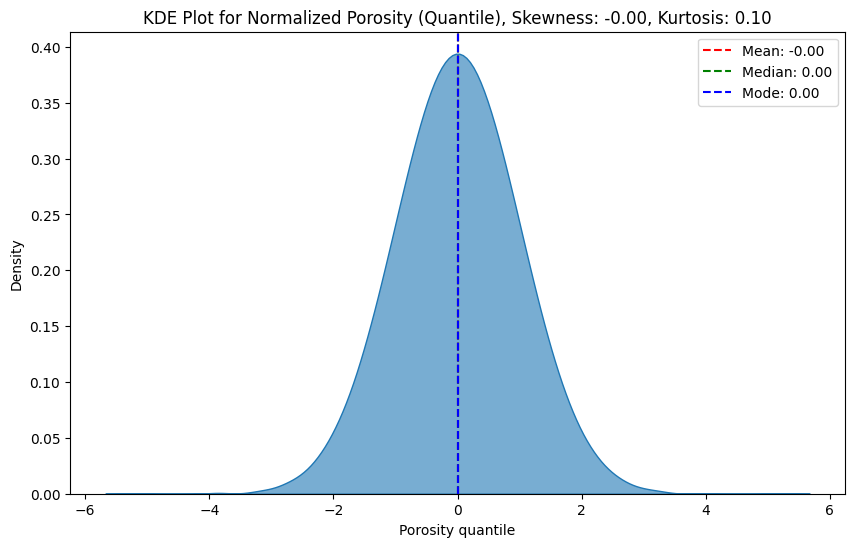

In [286]:
from sklearn.preprocessing import QuantileTransformer

# تبدیل داده‌ها با QuantileTransformer
qt = QuantileTransformer(output_distribution='normal', random_state=0)
dfs["Porosity"] = qt.fit_transform(dfs[["Porosity"]])

# محاسبه میانگین، میانه، مد، چولگی و کشیدگی
mean_val = dfs["Porosity"].mean()
median_val = dfs["Porosity"].median()
mode_val = dfs["Porosity"].mode()[0]
skew_val = skew(dfs["Porosity"])
kurt_val = kurtosis(dfs["Porosity"])

# رسم نمودار KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(dfs["Porosity"], fill=True, alpha=0.6)
plt.axvline(mean_val, color='r', linestyle='dashed', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='g', linestyle='dashed', label=f'Median: {median_val:.2f}')
plt.axvline(mode_val, color='b', linestyle='dashed', label=f'Mode: {mode_val:.2f}')
plt.title(f'KDE Plot for Normalized Porosity (Quantile), Skewness: {skew_val:.2f}, Kurtosis: {kurt_val:.2f}')
plt.xlabel("Porosity quantile")
plt.ylabel("Density")
plt.legend()
plt.show()

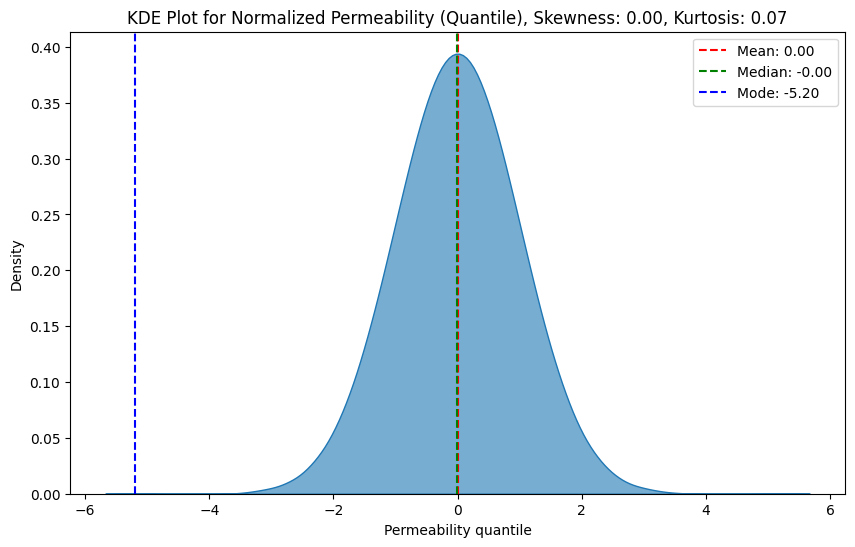

In [287]:
# تبدیل داده‌ها با QuantileTransformer
qt = QuantileTransformer(output_distribution='normal', random_state=0)
dfs["Permeability"] = qt.fit_transform(dfs[["Permeability"]])

# محاسبه میانگین، میانه، مد، چولگی و کشیدگی
mean_val = dfs["Permeability"].mean()
median_val = dfs["Permeability"].median()
mode_val = dfs["Permeability"].mode()[0]
skew_val = skew(dfs["Permeability"])
kurt_val = kurtosis(dfs["Permeability"])

# رسم نمودار KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(dfs["Permeability"], fill=True, alpha=0.6)
plt.axvline(mean_val, color='r', linestyle='dashed', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='g', linestyle='dashed', label=f'Median: {median_val:.2f}')
plt.axvline(mode_val, color='b', linestyle='dashed', label=f'Mode: {mode_val:.2f}')
plt.title(f'KDE Plot for Normalized Permeability (Quantile), Skewness: {skew_val:.2f}, Kurtosis: {kurt_val:.2f}')
plt.xlabel("Permeability quantile")
plt.ylabel("Density")
plt.legend()
plt.show()

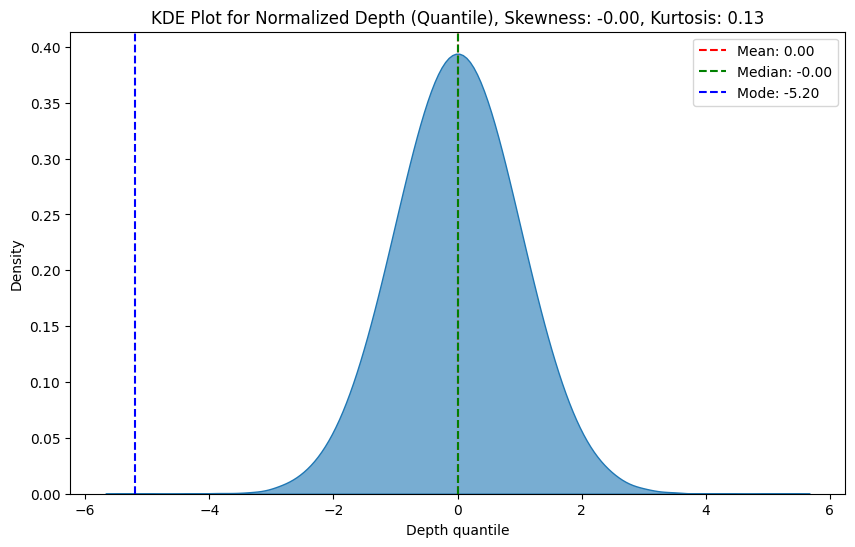

In [288]:
# تبدیل داده‌ها با QuantileTransformer
qt = QuantileTransformer(output_distribution='normal', random_state=0)
dfs["Depth"] = qt.fit_transform(dfs[["Depth"]])

# محاسبه میانگین، میانه، مد، چولگی و کشیدگی
mean_val = dfs["Depth"].mean()
median_val = dfs["Depth"].median()
mode_val = dfs["Depth"].mode()[0]
skew_val = skew(dfs["Depth"])
kurt_val = kurtosis(dfs["Depth"])

# رسم نمودار KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(dfs["Depth"], fill=True, alpha=0.6)
plt.axvline(mean_val, color='r', linestyle='dashed', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='g', linestyle='dashed', label=f'Median: {median_val:.2f}')
plt.axvline(mode_val, color='b', linestyle='dashed', label=f'Mode: {mode_val:.2f}')
plt.title(f'KDE Plot for Normalized Depth (Quantile), Skewness: {skew_val:.2f}, Kurtosis: {kurt_val:.2f}')
plt.xlabel("Depth quantile")
plt.ylabel("Density")
plt.legend()
plt.show()

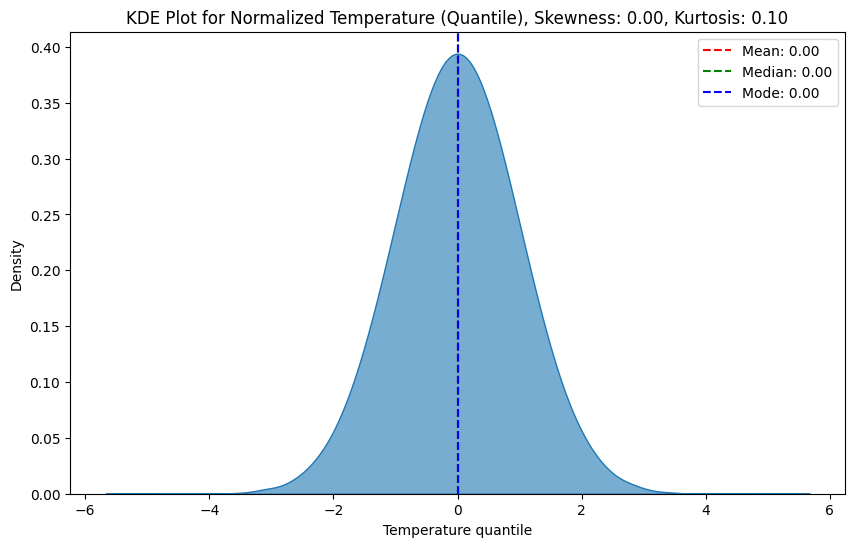

In [289]:
# تبدیل داده‌ها با QuantileTransformer
qt = QuantileTransformer(output_distribution='normal', random_state=0)
dfs["Temperature"] = qt.fit_transform(dfs[["Temperature"]])

# محاسبه میانگین، میانه، مد، چولگی و کشیدگی
mean_val = dfs["Temperature"].mean()
median_val = dfs["Temperature"].median()
mode_val = dfs["Temperature"].mode()[0]
skew_val = skew(dfs["Temperature"])
kurt_val = kurtosis(dfs["Temperature"])

# رسم نمودار KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(dfs["Temperature"], fill=True, alpha=0.6)
plt.axvline(mean_val, color='r', linestyle='dashed', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='g', linestyle='dashed', label=f'Median: {median_val:.2f}')
plt.axvline(mode_val, color='b', linestyle='dashed', label=f'Mode: {mode_val:.2f}')
plt.title(f'KDE Plot for Normalized Temperature (Quantile), Skewness: {skew_val:.2f}, Kurtosis: {kurt_val:.2f}')
plt.xlabel("Temperature quantile")
plt.ylabel("Density")
plt.legend()
plt.show()

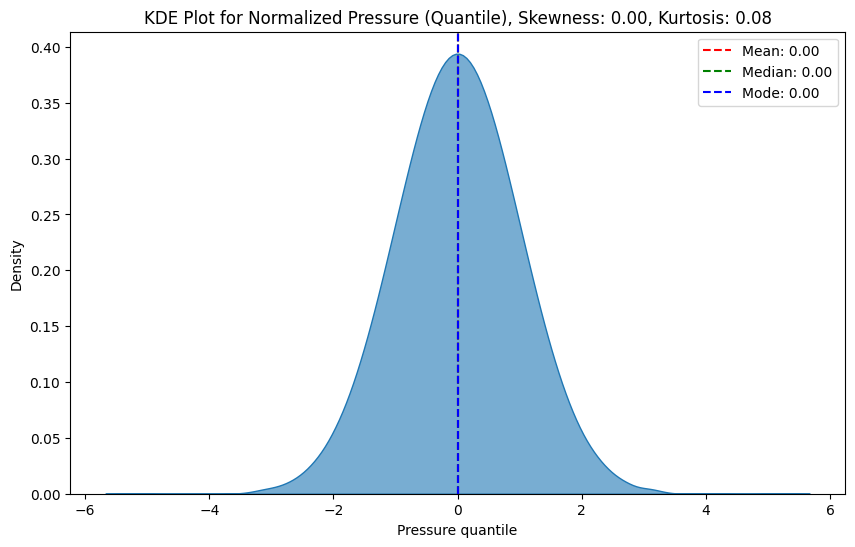

In [290]:
# تبدیل داده‌ها با QuantileTransformer
qt = QuantileTransformer(output_distribution='normal', random_state=0)
dfs["Pressure"] = qt.fit_transform(dfs[["Pressure"]])

# محاسبه میانگین، میانه، مد، چولگی و کشیدگی
mean_val = dfs["Pressure"].mean()
median_val = dfs["Pressure"].median()
mode_val = dfs["Pressure"].mode()[0]
skew_val = skew(dfs["Pressure"])
kurt_val = kurtosis(dfs["Pressure"])

# رسم نمودار KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(dfs["Pressure"], fill=True, alpha=0.6)
plt.axvline(mean_val, color='r', linestyle='dashed', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='g', linestyle='dashed', label=f'Median: {median_val:.2f}')
plt.axvline(mode_val, color='b', linestyle='dashed', label=f'Mode: {mode_val:.2f}')
plt.title(f'KDE Plot for Normalized Pressure (Quantile), Skewness: {skew_val:.2f}, Kurtosis: {kurt_val:.2f}')
plt.xlabel("Pressure quantile")
plt.ylabel("Density")
plt.legend()
plt.show()

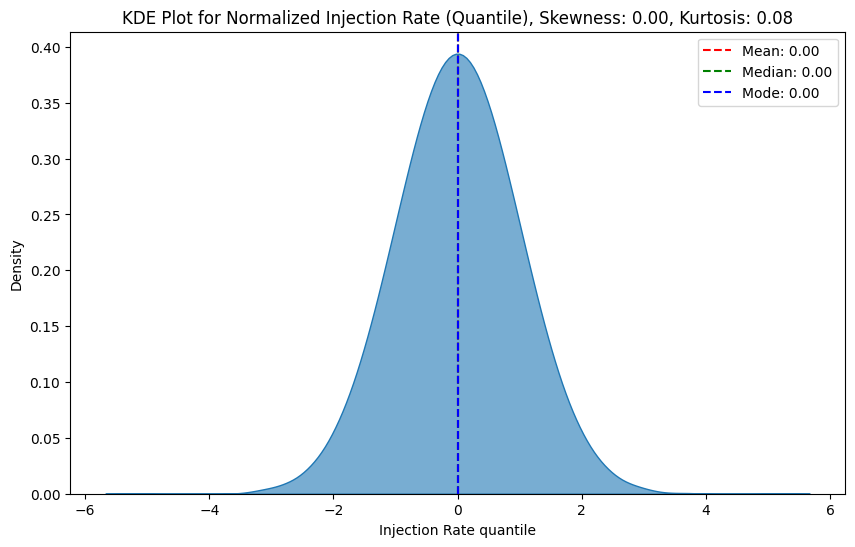

In [291]:
# تبدیل داده‌ها با QuantileTransformer
qt = QuantileTransformer(output_distribution='normal', random_state=0)
dfs["Injection Rate"] = qt.fit_transform(dfs[["Injection Rate"]])

# محاسبه میانگین، میانه، مد، چولگی و کشیدگی
mean_val = dfs["Injection Rate"].mean()
median_val = dfs["Injection Rate"].median()
mode_val = dfs["Injection Rate"].mode()[0]
skew_val = skew(dfs["Injection Rate"])
kurt_val = kurtosis(dfs["Injection Rate"])

# رسم نمودار KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(dfs["Injection Rate"], fill=True, alpha=0.6)
plt.axvline(mean_val, color='r', linestyle='dashed', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='g', linestyle='dashed', label=f'Median: {median_val:.2f}')
plt.axvline(mode_val, color='b', linestyle='dashed', label=f'Mode: {mode_val:.2f}')
plt.title(f'KDE Plot for Normalized Injection Rate (Quantile), Skewness: {skew_val:.2f}, Kurtosis: {kurt_val:.2f}')
plt.xlabel("Injection Rate quantile")
plt.ylabel("Density")
plt.legend()
plt.show()

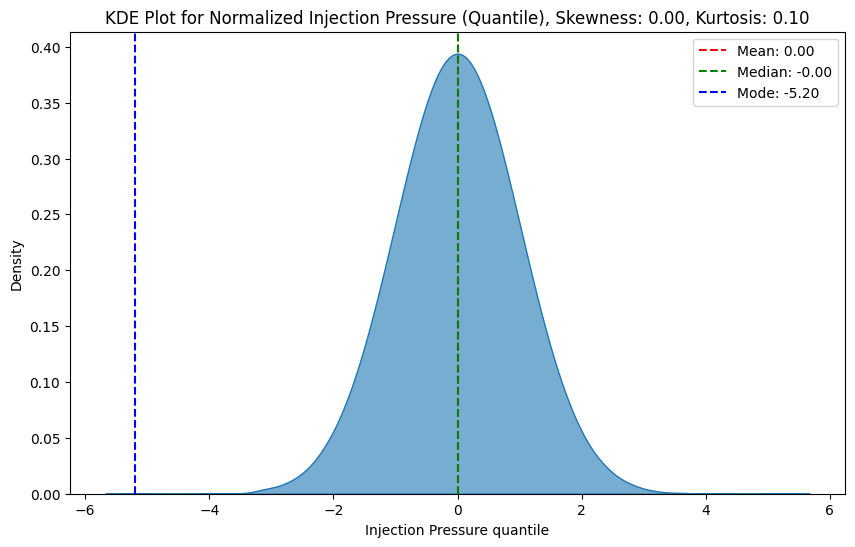

In [292]:
# تبدیل داده‌ها با QuantileTransformer
qt = QuantileTransformer(output_distribution='normal', random_state=0)
dfs["Injection Pressure"] = qt.fit_transform(dfs[["Injection Pressure"]])

# محاسبه میانگین، میانه، مد، چولگی و کشیدگی
mean_val = dfs["Injection Pressure"].mean()
median_val = dfs["Injection Pressure"].median()
mode_val = dfs["Injection Pressure"].mode()[0]
skew_val = skew(dfs["Injection Pressure"])
kurt_val = kurtosis(dfs["Injection Pressure"])

# رسم نمودار KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(dfs["Injection Pressure"], fill=True, alpha=0.6)
plt.axvline(mean_val, color='r', linestyle='dashed', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='g', linestyle='dashed', label=f'Median: {median_val:.2f}')
plt.axvline(mode_val, color='b', linestyle='dashed', label=f'Mode: {mode_val:.2f}')
plt.title(f'KDE Plot for Normalized Injection Pressure (Quantile), Skewness: {skew_val:.2f}, Kurtosis: {kurt_val:.2f}')
plt.xlabel("Injection Pressure quantile")
plt.ylabel("Density")
plt.legend()
plt.show()

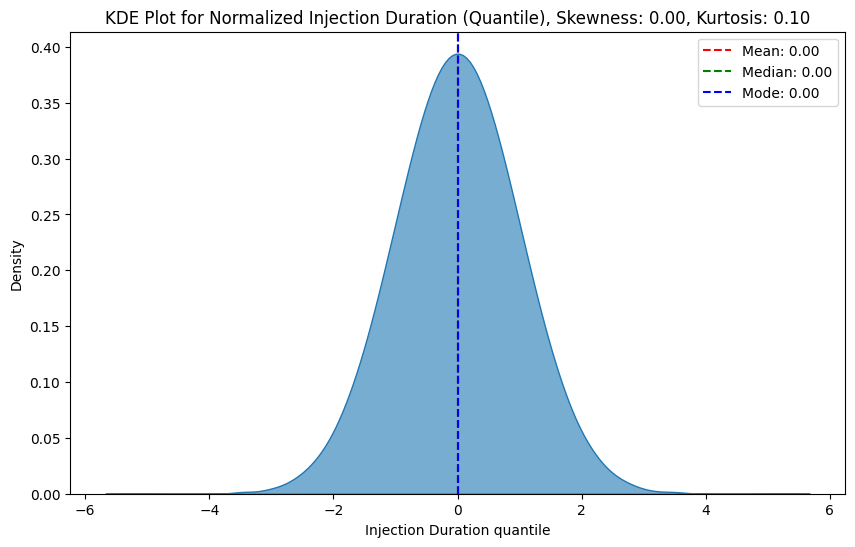

In [293]:
# تبدیل داده‌ها با QuantileTransformer
qt = QuantileTransformer(output_distribution='normal', random_state=0)
dfs["Injection Duration"] = qt.fit_transform(dfs[["Injection Duration"]])

# محاسبه میانگین، میانه، مد، چولگی و کشیدگی
mean_val = dfs["Injection Duration"].mean()
median_val = dfs["Injection Duration"].median()
mode_val = dfs["Injection Duration"].mode()[0]
skew_val = skew(dfs["Injection Duration"])
kurt_val = kurtosis(dfs["Injection Duration"])

# رسم نمودار KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(dfs["Injection Duration"], fill=True, alpha=0.6)
plt.axvline(mean_val, color='r', linestyle='dashed', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='g', linestyle='dashed', label=f'Median: {median_val:.2f}')
plt.axvline(mode_val, color='b', linestyle='dashed', label=f'Mode: {mode_val:.2f}')
plt.title(f'KDE Plot for Normalized Injection Duration (Quantile), Skewness: {skew_val:.2f}, Kurtosis: {kurt_val:.2f}')
plt.xlabel("Injection Duration quantile")
plt.ylabel("Density")
plt.legend()
plt.show()

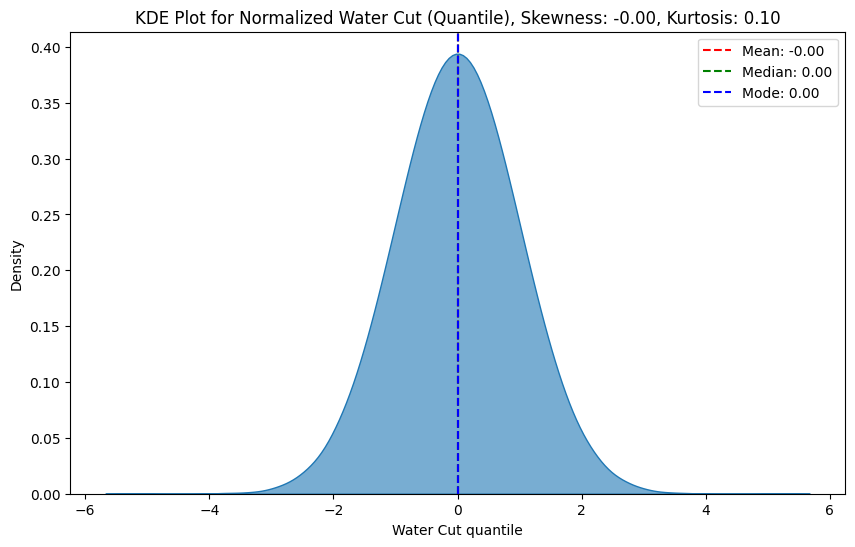

In [294]:
# تبدیل داده‌ها با QuantileTransformer
qt = QuantileTransformer(output_distribution='normal', random_state=0)
dfs["Water Cut"] = qt.fit_transform(dfs[["Water Cut"]])

# محاسبه میانگین، میانه، مد، چولگی و کشیدگی
mean_val = dfs["Water Cut"].mean()
median_val = dfs["Water Cut"].median()
mode_val = dfs["Water Cut"].mode()[0]
skew_val = skew(dfs["Water Cut"])
kurt_val = kurtosis(dfs["Water Cut"])

# رسم نمودار KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(dfs["Water Cut"], fill=True, alpha=0.6)
plt.axvline(mean_val, color='r', linestyle='dashed', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='g', linestyle='dashed', label=f'Median: {median_val:.2f}')
plt.axvline(mode_val, color='b', linestyle='dashed', label=f'Mode: {mode_val:.2f}')
plt.title(f'KDE Plot for Normalized Water Cut (Quantile), Skewness: {skew_val:.2f}, Kurtosis: {kurt_val:.2f}')
plt.xlabel("Water Cut quantile")
plt.ylabel("Density")
plt.legend()
plt.show()

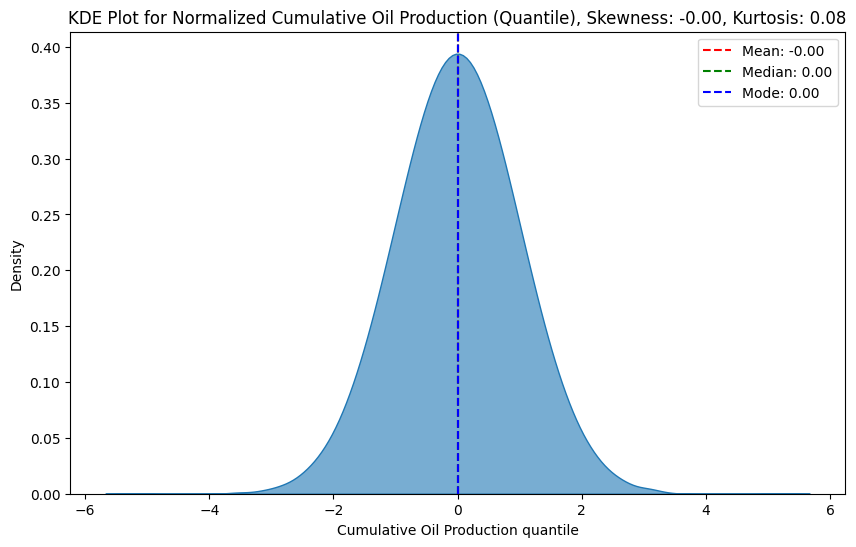

In [295]:
# تبدیل داده‌ها با QuantileTransformer
qt = QuantileTransformer(output_distribution='normal', random_state=0)
dfs["Cumulative Oil Production"] = qt.fit_transform(dfs[["Cumulative Oil Production"]])

# محاسبه میانگین، میانه، مد، چولگی و کشیدگی
mean_val = dfs["Cumulative Oil Production"].mean()
median_val = dfs["Cumulative Oil Production"].median()
mode_val = dfs["Cumulative Oil Production"].mode()[0]
skew_val = skew(dfs["Cumulative Oil Production"])
kurt_val = kurtosis(dfs["Cumulative Oil Production"])

# رسم نمودار KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(dfs["Cumulative Oil Production"], fill=True, alpha=0.6) # Changed this line to the correct column name
plt.axvline(mean_val, color='r', linestyle='dashed', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='g', linestyle='dashed', label=f'Median: {median_val:.2f}')
plt.axvline(mode_val, color='b', linestyle='dashed', label=f'Mode: {mode_val:.2f}')
plt.title(f'KDE Plot for Normalized Cumulative Oil Production (Quantile), Skewness: {skew_val:.2f}, Kurtosis: {kurt_val:.2f}')
plt.xlabel("Cumulative Oil Production quantile")
plt.ylabel("Density")
plt.legend()
plt.show()

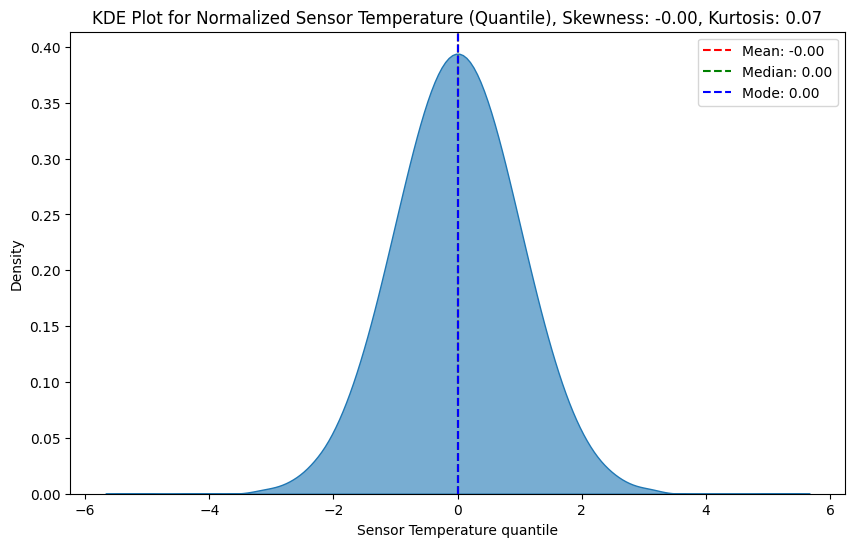

In [296]:
# تبدیل داده‌ها با QuantileTransformer
qt = QuantileTransformer(output_distribution='normal', random_state=0)
dfs["Sensor Temperature"] = qt.fit_transform(dfs[["Sensor Temperature"]])

# محاسبه میانگین، میانه، مد، چولگی و کشیدگی
mean_val = dfs["Sensor Temperature"].mean()
median_val = dfs["Sensor Temperature"].median()
mode_val = dfs["Sensor Temperature"].mode()[0]
skew_val = skew(dfs["Sensor Temperature"])
kurt_val = kurtosis(dfs["Sensor Temperature"])

# رسم نمودار KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(dfs["Sensor Temperature"], fill=True, alpha=0.6)
plt.axvline(mean_val, color='r', linestyle='dashed', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='g', linestyle='dashed', label=f'Median: {median_val:.2f}')
plt.axvline(mode_val, color='b', linestyle='dashed', label=f'Mode: {mode_val:.2f}')
plt.title(f'KDE Plot for Normalized Sensor Temperature (Quantile), Skewness: {skew_val:.2f}, Kurtosis: {kurt_val:.2f}')
plt.xlabel("Sensor Temperature quantile")
plt.ylabel("Density")
plt.legend()
plt.show()

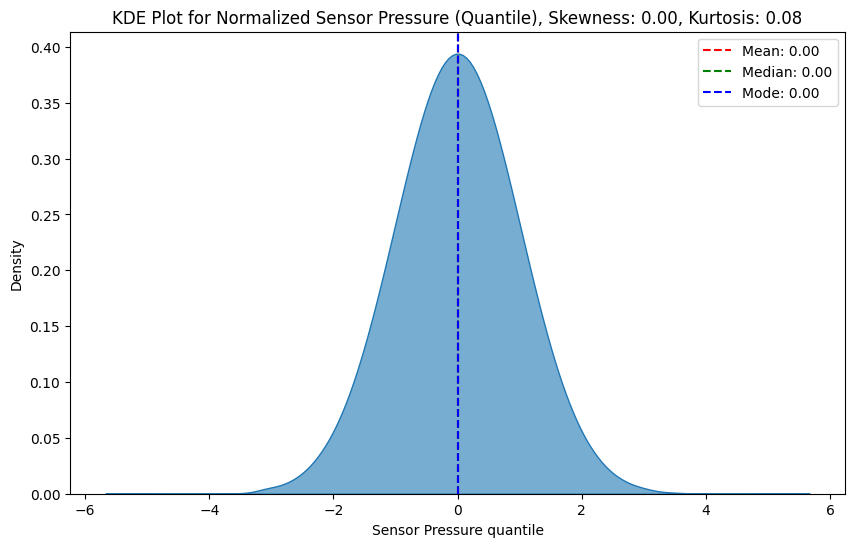

In [297]:
# تبدیل داده‌ها با QuantileTransformer
qt = QuantileTransformer(output_distribution='normal', random_state=0)
dfs["Sensor Pressure"] = qt.fit_transform(dfs[["Sensor Pressure"]])

# محاسبه میانگین، میانه، مد، چولگی و کشیدگی
mean_val = dfs["Sensor Pressure"].mean()
median_val = dfs["Sensor Pressure"].median()
mode_val = dfs["Sensor Pressure"].mode()[0]
skew_val = skew(dfs["Sensor Pressure"])
kurt_val = kurtosis(dfs["Sensor Pressure"])

# رسم نمودار KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(dfs["Sensor Pressure"], fill=True, alpha=0.6)
plt.axvline(mean_val, color='r', linestyle='dashed', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='g', linestyle='dashed', label=f'Median: {median_val:.2f}')
plt.axvline(mode_val, color='b', linestyle='dashed', label=f'Mode: {mode_val:.2f}')
plt.title(f'KDE Plot for Normalized Sensor Pressure (Quantile), Skewness: {skew_val:.2f}, Kurtosis: {kurt_val:.2f}')
plt.xlabel("Sensor Pressure quantile")
plt.ylabel("Density")
plt.legend()
plt.show()

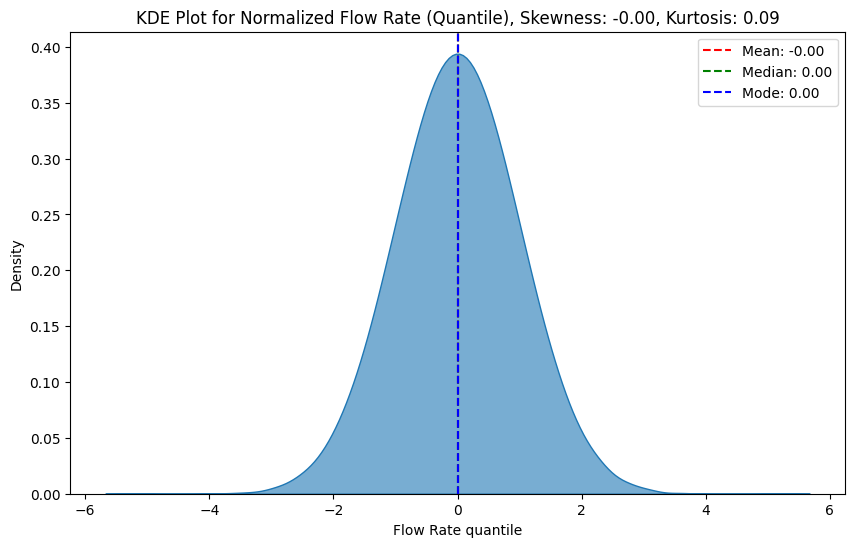

In [298]:
# تبدیل داده‌ها با QuantileTransformer
qt = QuantileTransformer(output_distribution='normal', random_state=0)
dfs["Flow Rate"] = qt.fit_transform(dfs[["Flow Rate"]])

# محاسبه میانگین، میانه، مد، چولگی و کشیدگی
mean_val = dfs["Flow Rate"].mean()
median_val = dfs["Flow Rate"].median()
mode_val = dfs["Flow Rate"].mode()[0]
skew_val = skew(dfs["Flow Rate"])
kurt_val = kurtosis(dfs["Flow Rate"])

# رسم نمودار KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(dfs["Flow Rate"], fill=True, alpha=0.6)
plt.axvline(mean_val, color='r', linestyle='dashed', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='g', linestyle='dashed', label=f'Median: {median_val:.2f}')
plt.axvline(mode_val, color='b', linestyle='dashed', label=f'Mode: {mode_val:.2f}')
plt.title(f'KDE Plot for Normalized Flow Rate (Quantile), Skewness: {skew_val:.2f}, Kurtosis: {kurt_val:.2f}')
plt.xlabel("Flow Rate quantile")
plt.ylabel("Density")
plt.legend()
plt.show()

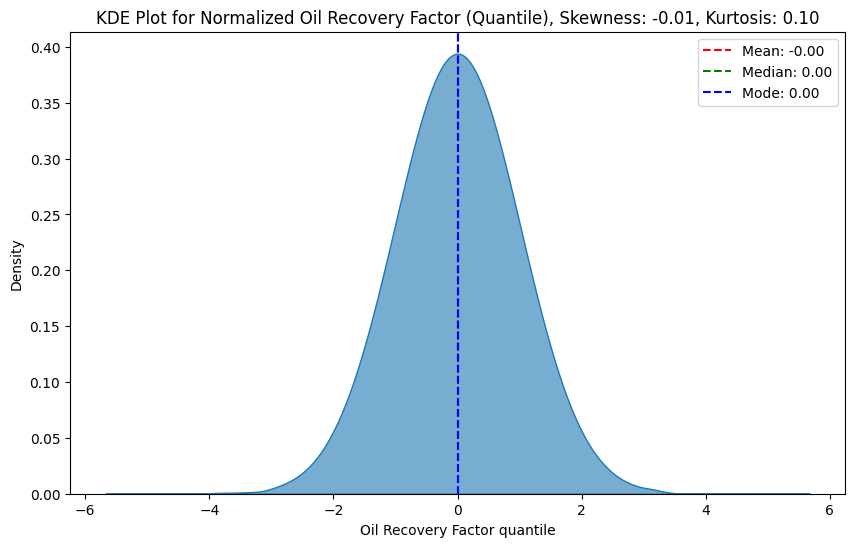

In [299]:
# تبدیل داده‌ها با QuantileTransformer
qt = QuantileTransformer(output_distribution='normal', random_state=0)
dfs["Oil Recovery Factor"] = qt.fit_transform(dfs[["Oil Recovery Factor"]])

# محاسبه میانگین، میانه، مد، چولگی و کشیدگی
mean_val = dfs["Oil Recovery Factor"].mean()
median_val = dfs["Oil Recovery Factor"].median()
mode_val = dfs["Oil Recovery Factor"].mode()[0]
skew_val = skew(dfs["Oil Recovery Factor"])
kurt_val = kurtosis(dfs["Oil Recovery Factor"])

# رسم نمودار KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(dfs["Oil Recovery Factor"], fill=True, alpha=0.6)
plt.axvline(mean_val, color='r', linestyle='dashed', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='g', linestyle='dashed', label=f'Median: {median_val:.2f}')
plt.axvline(mode_val, color='b', linestyle='dashed', label=f'Mode: {mode_val:.2f}')
plt.title(f'KDE Plot for Normalized Oil Recovery Factor (Quantile), Skewness: {skew_val:.2f}, Kurtosis: {kurt_val:.2f}')
plt.xlabel("Oil Recovery Factor quantile")
plt.ylabel("Density")
plt.legend()
plt.show()

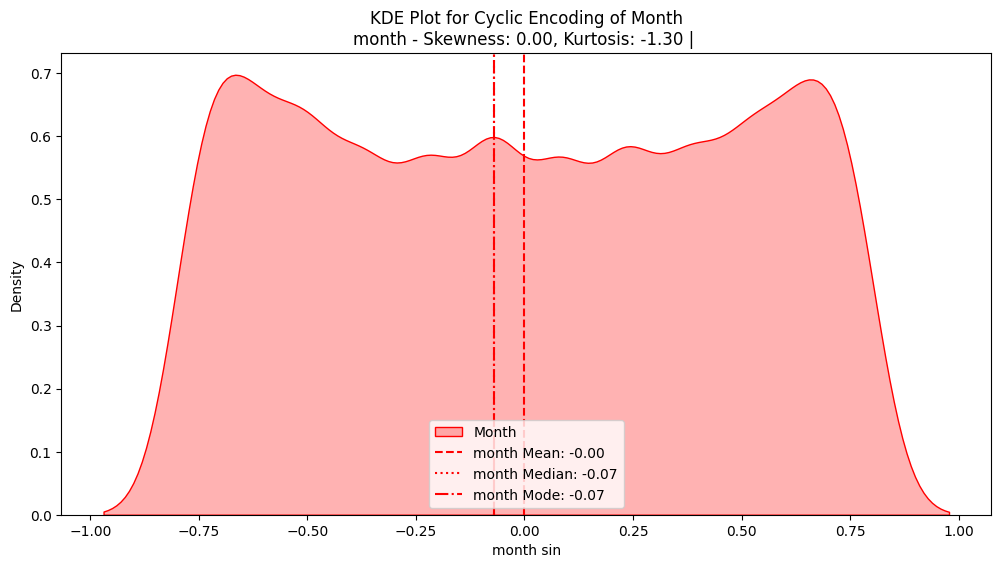

In [300]:
from scipy.stats import skew, kurtosis, mode

# تبدیل ماه به سینوسی و کسینوسی برای حفظ تناوب
dfs['month'] = np.sin(2 * np.pi * dfs['month'] / 12)
#dfs['month_cos'] = np.cos(2 * np.pi * dfs['month'] / 12)

# رسم KDE برای سینوسی و کسینوسی ماه
plt.figure(figsize=(12, 6))

# ویژگی‌هایی که باید نمایش داده شوند
features = ['month']
colors = ['red']

for feature, color in zip(features, colors):
    # محاسبه مقادیر آماری
    mean_val = np.mean(dfs[feature])
    median_val = np.median(dfs[feature])

    # بررسی مد: اگر مقدار برگشتی دارای `.mode` باشد، از آن استفاده کن
    mode_result = mode(dfs[feature], keepdims=True)  # در نسخه‌های جدید SciPy `keepdims=True` الزامی است
    mode_val = mode_result.mode[0] if hasattr(mode_result, 'mode') else mode_result[0]

    skew_val = skew(dfs[feature])
    kurt_val = kurtosis(dfs[feature])

    # رسم KDE
    sns.kdeplot(dfs[feature], fill=True, color=color, alpha=0.3, label=f'{feature.capitalize()}')

    # افزودن خطوط آماری
    plt.axvline(mean_val, color=color, linestyle='dashed', label=f'{feature} Mean: {mean_val:.2f}')
    plt.axvline(median_val, color=color, linestyle='dotted', label=f'{feature} Median: {median_val:.2f}')
    plt.axvline(mode_val, color=color, linestyle='dashdot', label=f'{feature} Mode: {mode_val:.2f}')

    # نمایش مقادیر چولگی و کشیدگی در عنوان
    plt.title(f'KDE Plot for Cyclic Encoding of Month\n'
              f'{features[0]} - Skewness: {skew(dfs[features[0]]):.2f}, Kurtosis: {kurtosis(dfs[features[0]]):.2f} | '
              )

plt.xlabel('month sin')
plt.ylabel('Density')
plt.legend()
plt.show()


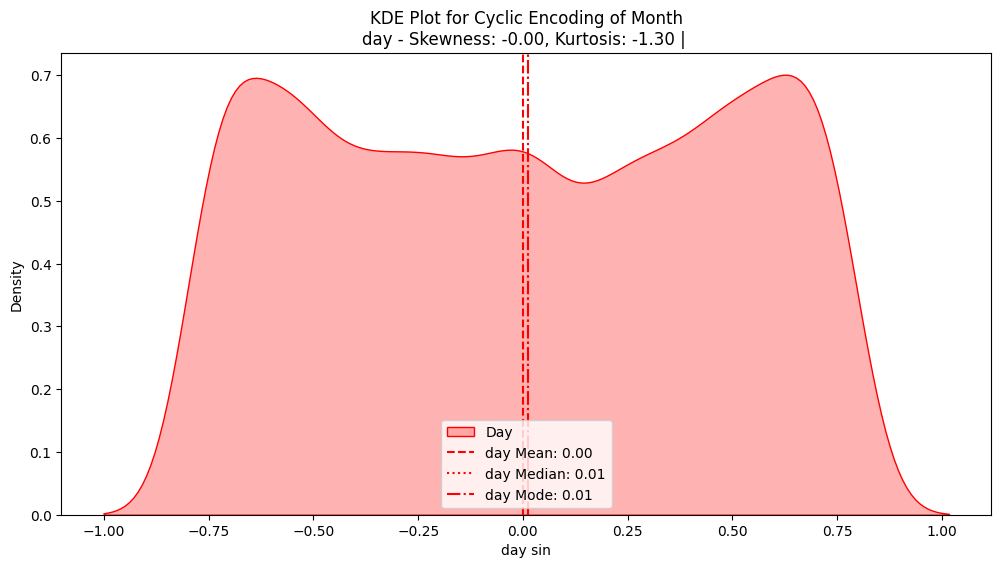

In [301]:
from scipy.stats import skew, kurtosis, mode

# تبدیل ماه به سینوسی و کسینوسی برای حفظ تناوب
dfs['day'] = np.sin(2 * np.pi * dfs['day'] / 12)
#dfs['day_cos'] = np.cos(2 * np.pi * dfs['day'] / 12)

# رسم KDE برای سینوسی و کسینوسی ماه
plt.figure(figsize=(12, 6))

# ویژگی‌هایی که باید نمایش داده شوند
features = ['day']
colors = ['red']

for feature, color in zip(features, colors):
    # محاسبه مقادیر آماری
    mean_val = np.mean(dfs[feature])
    median_val = np.median(dfs[feature])

    # بررسی مد: اگر مقدار برگشتی دارای `.mode` باشد، از آن استفاده کن
    mode_result = mode(dfs[feature], keepdims=True)  # در نسخه‌های جدید SciPy `keepdims=True` الزامی است
    mode_val = mode_result.mode[0] if hasattr(mode_result, 'mode') else mode_result[0]

    skew_val = skew(dfs[feature])
    kurt_val = kurtosis(dfs[feature])

    # رسم KDE
    sns.kdeplot(dfs[feature], fill=True, color=color, alpha=0.3, label=f'{feature.capitalize()}')

    # افزودن خطوط آماری
    plt.axvline(mean_val, color=color, linestyle='dashed', label=f'{feature} Mean: {mean_val:.2f}')
    plt.axvline(median_val, color=color, linestyle='dotted', label=f'{feature} Median: {median_val:.2f}')
    plt.axvline(mode_val, color=color, linestyle='dashdot', label=f'{feature} Mode: {mode_val:.2f}')

    # نمایش مقادیر چولگی و کشیدگی در عنوان
    plt.title(f'KDE Plot for Cyclic Encoding of Month\n'
              f'{features[0]} - Skewness: {skew(dfs[features[0]]):.2f}, Kurtosis: {kurtosis(dfs[features[0]]):.2f} | '
              )

plt.xlabel('day sin')
plt.ylabel('Density')
plt.legend()
plt.show()

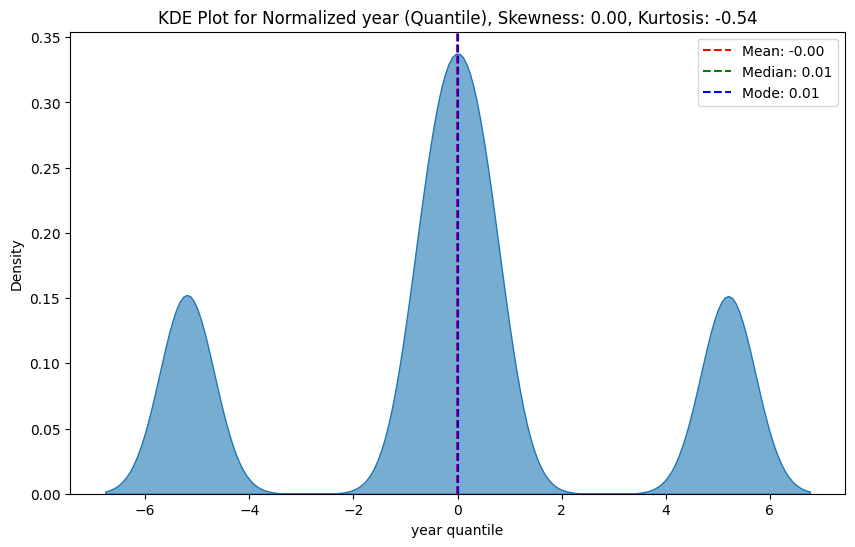

In [302]:
# تبدیل داده‌ها با QuantileTransformer
qt = QuantileTransformer(output_distribution='normal', random_state=0)
dfs["year"] = qt.fit_transform(dfs[["year"]])

# محاسبه میانگین، میانه، مد، چولگی و کشیدگی
mean_val = dfs["year"].mean()
median_val = dfs["year"].median()
mode_val = dfs["year"].mode()[0]
skew_val = skew(dfs["year"])
kurt_val = kurtosis(dfs["year"])

# رسم نمودار KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(dfs["year"], fill=True, alpha=0.6)
plt.axvline(mean_val, color='r', linestyle='dashed', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='g', linestyle='dashed', label=f'Median: {median_val:.2f}')
plt.axvline(mode_val, color='b', linestyle='dashed', label=f'Mode: {mode_val:.2f}')
plt.title(f'KDE Plot for Normalized year (Quantile), Skewness: {skew_val:.2f}, Kurtosis: {kurt_val:.2f}')
plt.xlabel("year quantile")
plt.ylabel("Density")
plt.legend()
plt.show()

In [303]:
Q1 = dfs['year'].quantile(0.25)
Q3 = dfs['year'].quantile(0.75)
IQR = Q3 - Q1

# محدوده‌ی مجاز داده‌ها را مشخص کن
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# حذف داده‌های پرت
dfs = dfs[(dfs['year'] >= lower_bound) & (dfs['year'] <= upper_bound)]

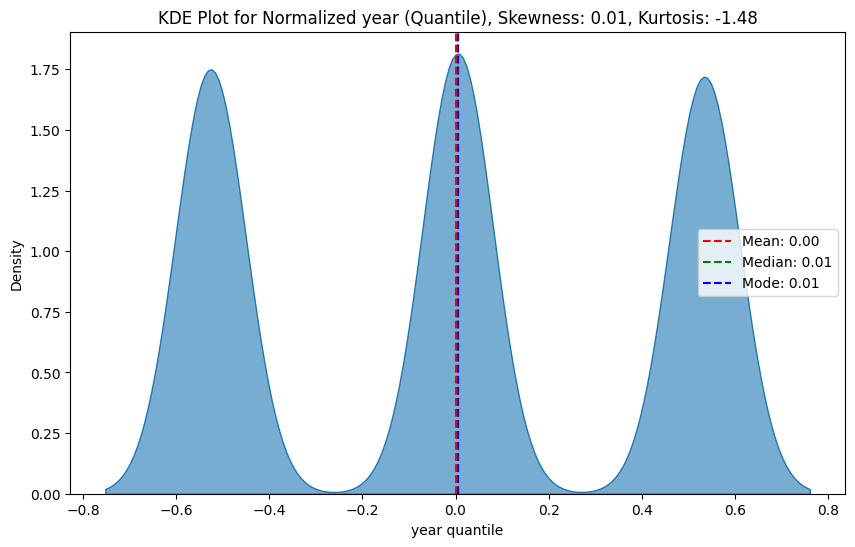

In [304]:
# محاسبه میانگین، میانه، مد، چولگی و کشیدگی
mean_val = dfs["year"].mean()
median_val = dfs["year"].median()
mode_val = dfs["year"].mode()[0]
skew_val = skew(dfs["year"])
kurt_val = kurtosis(dfs["year"])

# رسم نمودار KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(dfs["year"], fill=True, alpha=0.6)
plt.axvline(mean_val, color='r', linestyle='dashed', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='g', linestyle='dashed', label=f'Median: {median_val:.2f}')
plt.axvline(mode_val, color='b', linestyle='dashed', label=f'Mode: {mode_val:.2f}')
plt.title(f'KDE Plot for Normalized year (Quantile), Skewness: {skew_val:.2f}, Kurtosis: {kurt_val:.2f}')
plt.xlabel("year quantile")
plt.ylabel("Density")
plt.legend()
plt.show()

In [305]:
features=['Porosity','Permeability','Depth','Temperature','Pressure','Injection Rate','Injection Pressure','Injection Duration','Oil Production Rate','Water Cut','Cumulative Oil Production',
          'Sensor Temperature','Sensor Pressure','Flow Rate','Oil Recovery Factor','year','month','day']

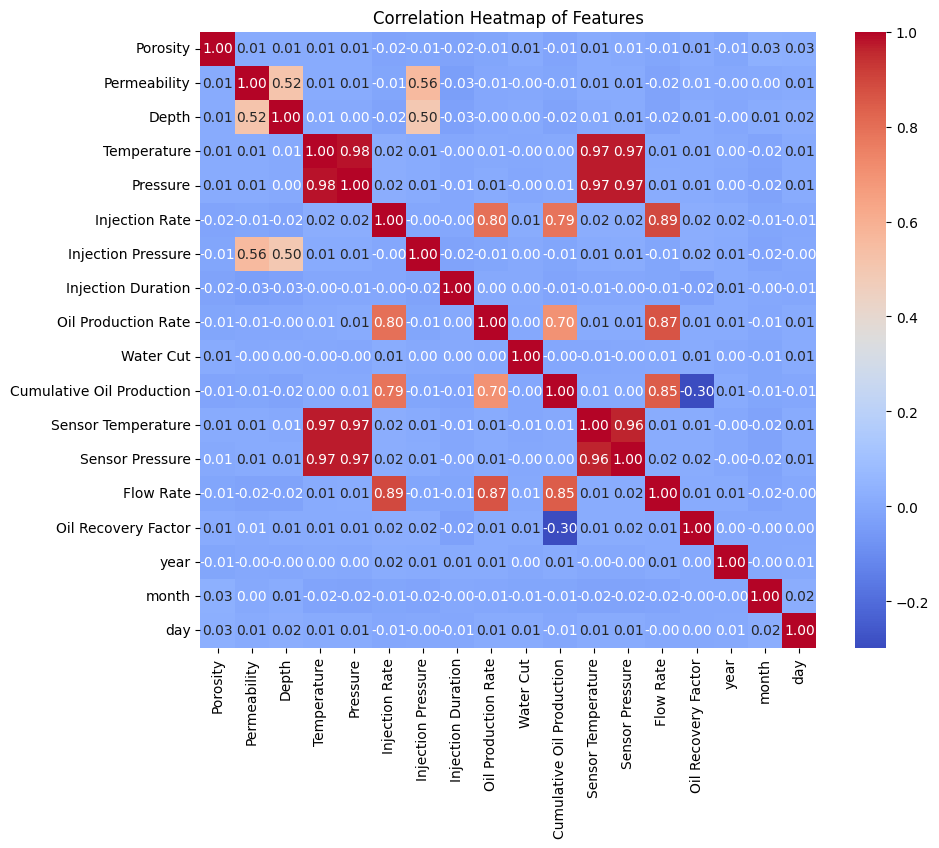

In [306]:
correlation_matrix=dfs[features].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f',square=True)
plt.title('Correlation Heatmap of Features')
plt.show()